Experimenting with making a fits file for the hslp

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import astropy.io.fits as fits
import os
from scipy.io.idl import readsav
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling import models, fitting
from craftroom import resample
from scipy.interpolate import interp1d


%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
ecsv_table = Table.read('../combined/gj_674_sed_var_res_v3.ecsv')

/home/david/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:981: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


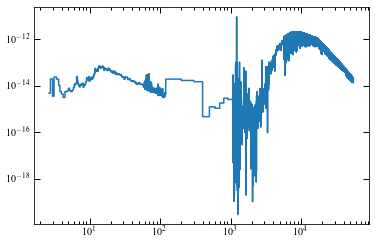

In [3]:
plt.plot(ecsv_table['WAVELENGTH'][ecsv_table['FLUX'] >0], ecsv_table['FLUX'][ecsv_table['FLUX'] >0], drawstyle='steps-mid')
plt.xscale('log')
plt.yscale('log')

What's in a MUSCLES fits file?

In [4]:
hdul = fits.open('../../../stuff/muscles_eg/gj176/hlsp_muscles_multi_multi_gj176_broadband_v22_var-res-sed.fits')

In [5]:
hdul.info()

Filename: ../../../stuff/muscles_eg/gj176/hlsp_muscles_multi_multi_gj176_broadband_v22_var-res-sed.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      53   ()      
  1  SPECTRUM      1 BinTableHDU     59   1196260R x 13C   [D, D, D, D, D, D, I, D, D, J, D, D, D]   
  2  INSTLGND      1 BinTableHDU     32   24R x 5C   [J, 5A, 18A, 6A, 70A]   


In [6]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TELESCOP= 'MULTI   '                                                            
INSTRUME= 'MULTI   '                                                            
GRATING = 'MULTI   '                                                            
TELESC00= 'MODEL   '                                                            
INSTRU00= 'PHX     '                                                            
GRATIN00= 'NA      '                                                            
TELESC01= 'MODEL   '                                                            
INSTRU01= 'EUV-SCALING'                                                         
GRATIN01= 'NA      '        

Ok that looks easy, I can build that from the instrument file.

In [7]:
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   94 / length of dimension 1                          
NAXIS2  =              1196260 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   13 / number of table fields                         
EXTNAME = 'SPECTRUM'                                                            
EXTNO   =                    2                                                  
TDESC1  = 'midpoint of the wavelength bin'                                      
TDESC2  = 'left/blue edge of the wavelength bin'                                
TDESC3  = 'right/red edge of

In [8]:
hdul[2].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  103 / length of dimension 1                          
NAXIS2  =                   24 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    5 / number of table fields                         
EXTNO   =                    3                                                  
TTYPE1  = 'BITVALUE'                                                            
TFORM1  = 'J       '                                                            
TTYPE2  = 'TELESCOPE'                                                           
TFORM2  = '5A      '        

making a fake spectrum to experiment with

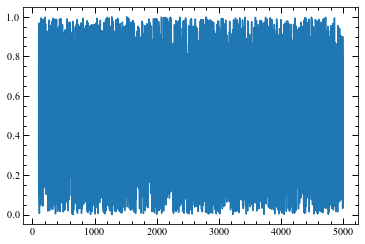

In [9]:
w = np.arange(100, 5000, 1)
f = np.random.random(len(w))
plt.plot(w,f)

In [10]:
data = Table([w*u.AA, f*u.erg/u.s/u.cm**2/u.AA], names = ['WAVELENGTH', 'FLUX'])

In [12]:
#data.write('test.fits')

In [ ]:
hdul = fits.open('test.fits')

In [ ]:
hdul.info()

In [ ]:
hdul[1].header

In [ ]:
data.meta['TEST'] ='hello'

In [ ]:
hdul.close()

In [ ]:
data.write('test.fits', overwrite= True)

In [ ]:
hdul = fits.open('test.fits')

In [ ]:
hdul[0].header

In [ ]:
hdul[0].header['test'] = 'Hello again'

In [ ]:
hdul[0].header

In [ ]:
hdul[0].header['test2'] = 'Hello thrice'

In [ ]:
hdul[0].header

Looks like what I need is here https://docs.astropy.org/en/stable/io/fits/#creating-a-new-fits-file

In [ ]:
dat, names = [w*u.AA, f*u.erg/u.s/u.cm**2/u.AA], ['WAVELENGTH', 'FLUX']
cols = []
for col, name in zip(dat, names):
    cols.append(fits.Column(name=name, format ='E', array=col))

In [ ]:
data = Table([w*u.AA, f*u.erg/u.s/u.cm**2/u.AA], names = ['WAVELENGTH', 'FLUX'])

In [ ]:
hdu = fits.table_to_hdu(data)

In [ ]:
hdu.header

In [ ]:
hdr = fits.Header()
hdr['Line1'] = 'This should be first'
hdr['parttwo'] ='Then this one'
primary_hdu = fits.PrimaryHDU(header=hdr)

In [ ]:
hdul2 = fits.HDUList([primary_hdu, hdu])
hdul2.writeto('test2.fits', overwrite=True)

In [ ]:
fits.getheader('test2.fits',1)

Ok, how to add keywords in the right order?

In [ ]:
hdr

In [ ]:
hdr[0]

In [ ]:
hdr[0] =' now what'

In [ ]:
hdr['Adding'] = 'where?'

In [ ]:
hdr.insert(2, 'Another', 'fixed')

In [ ]:
hdr

In [ ]:
del hdr['MIDDLEmaybe?']

In [ ]:
hdr ['ANOTHER'] = 'good'

In [ ]:
hdr

Ok, what about the data header?

In [ ]:
hdr2 = hdu.header

In [ ]:
hdr2

In [ ]:
hdr2['TEST'] = 'oh look'

In [ ]:
hdr2

In [ ]:
for i, n  in zip((8,9), ('Another', 'again')):
    hdr2.insert(i, n)
#print(hdr2)
hdr2

In [ ]:
#del hdr2['ANOTHER']
#del hdr2['and again']
#hdr2

In [ ]:
hdul = fits.open('../../../stuff/muscles_eg/gj176/hlsp_muscles_multi_multi_gj176_broadband_v22_var-res-sed.fits')

In [ ]:
hdul[1].header

In [ ]:
hdul[0].header

In [ ]:
primary_hdu.header

Primary header needs a list of all instruments used.

In [ ]:
ints = np.unique(ecsv_table['INSTRUMENT'])

In [ ]:
ints

Why are there -99s and 0s in there? Fixed it.

In [ ]:
import instruments as inst

In [ ]:
for i in ints:
    print(inst.getinststr(i))

In [ ]:
plt.plot(ecsv_table['WAVELENGTH'], ecsv_table['INSTRUMENT'])
plt.ylim(6100, 6200)
plt.xscale('log')

Bit of Parke's code that hopefully makes the instrument ext

In [ ]:
legendcomment = ('This extension is a legend for the integer identifiers in the instrument column of the '
                  'spectrum extension. Instruments are identified by bitwise flags so that any combination of '
                  'instruments contributing to the data within a spectral element can be identified together. '
                  'For example, if instruments 4 and 16 (100 and 10000 in binary) both contribute to the data '
                  'in a bin, then that bin will have the value 20, or 10100 in binary, to signify that both '
                  'instruments 4 and 16 have contributed. This is identical to the handling of bitwise data '
                  'quality flags.')

def make_inst_ext():
    cols = [fits.Column('instruments','13A', array=inst.instruments),
                fits.Column('bitvalues', 'I', array=inst.instvals)]
    hdr = fits.Header()
    hdr['comment'] = legendcomment
    idhdu = fits.BinTableHDU.from_columns(cols, header=hdr, name='legend')
    #ftbl.append(idhdu)
    return idhdu

idhu = make_inst_ext()

In [ ]:
idhu.header

In [ ]:
hdul[2].header

In [ ]:
idhu.data

In [ ]:
hdul[2].data

In [ ]:
ecsv_table.meta

io.writehlsp has what I want for the HLSP- need to modify it but should all be there

In [ ]:
from my_write_hlsp import writehlsp as hlsp_test

In [ ]:
hlsp_test(ecsv_table)

What's in the separate spectra?

In [ ]:
muscles_path = '../../../stuff/muscles_eg/gj176/'
os.listdir(muscles_path)

In [ ]:
hdul3 = fits.open(muscles_path+ 'hlsp_muscles_hst_cos_gj176_g130m_v22_component-spec.fits')

In [ ]:
hdul3.info()

In [ ]:
hdul3[0].header

In [ ]:
hdul3[2].header

In [ ]:
hdul3.info()

In [13]:
hdul3[2].data

NameError: name 'hdul3' is not defined